In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#messo n_parseg = 150 e sembra avere senso lo spettrogramma anche se non sono 100 come nell'articolo
parseg = 100

# SIGMOID2. media a 4

In [3]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
alpha = 0.2573329144325134
alpha_mean = 0.16799556857190273

In [4]:
function0 = "sigmoid2.0"
function1 = "sigmoid2.1"
function2 = "sigmoid2.2"
function3 = "sigmoid2.3"

In [5]:
Dd = "0.95"
subnets = "STN"
sigm_par = 0.002

new_Dd = Dd.replace('.','_')
#new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function0 + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T

#check if periodogram folder exists and if not create one
#spikesim
periodogram_path0 = './periodograms/' + new_Dd + '_' + subnets + '_' + function0 
if not os.path.exists(periodogram_path0):
    os.makedirs(periodogram_path0) 
s0 = utils.SpikeSim("./build/output/n1/" + function0 + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

periodogram_path1 = './periodograms/' + new_Dd + '_' + subnets + '_' + function1 
if not os.path.exists(periodogram_path1):
    os.makedirs(periodogram_path1)
s1 = utils.SpikeSim("./build/output/n1/" + function1 + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

periodogram_path2 = './periodograms/' + new_Dd + '_' + subnets + '_' + function2
if not os.path.exists(periodogram_path2):
    os.makedirs(periodogram_path2)
s2 = utils.SpikeSim("./build/output/n1/" + function2 + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))

periodogram_path3 = './periodograms/' + new_Dd + '_' + subnets + '_' + function3
if not os.path.exists(periodogram_path3):
    os.makedirs(periodogram_path3) 
s3 = utils.SpikeSim("./build/output/n1/" + function3 + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data[0]))


In [6]:
#dopamine depletion periodogram
#s.periodogramdd(pop=subnets, data=data, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + function + "_periodogram.png")

nparseg = 100	noverlap=20
nparseg = 100	noverlap=20
nparseg = 100	noverlap=20
nparseg = 100	noverlap=20
frequenza del massimo: 17.0
valore del massimo: 25.36639472446496


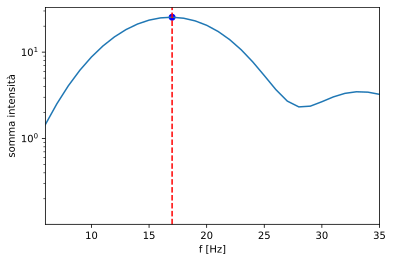

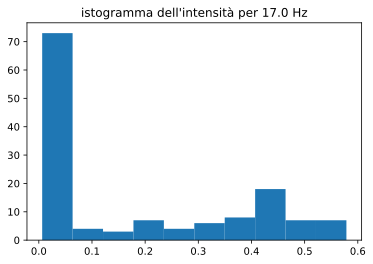

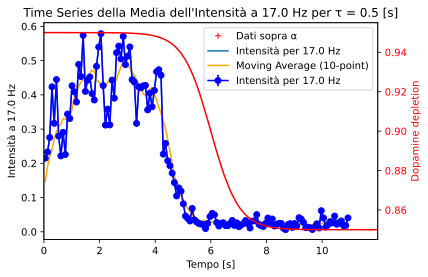

In [7]:
output0=s0.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path0 + "/periodogram.png")
output1=s1.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path1 + "/periodogram.png")
output2=s2.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path2 + "/periodogram.png")
output3=s3.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path3 + "/periodogram.png")

f = output0[0]
t = output0[1]
Sxx =  (output0[2] + output1[2] + output2[2] + output3[2])/4
data[0] = data[0]/1000
data[1] = data[1]/1.083

# Calcola le deviazioni standard o gli errori associati a Sxx
# Ad esempio, puoi calcolare l'errore come la deviazione standard della media
# Calcola le deviazioni standard lungo l'asse delle frequenze
Sxx_std = np.std(Sxx, axis=0)

# Calcola gli errori come deviazione standard divisa per la radice quadrata del numero di campioni
Sxx_error = Sxx_std / np.sqrt(Sxx.shape[0])  # Assumendo che Sxx sia una matrice (frequenze x tempo)


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, Sxx_max_index, yerr=Sxx_error, label=f'Intensità per {f[max_index]:.1f} Hz', fmt='o-', capsize=1, color='blue')

ax1.plot(t[Sxx_max_index >= alpha], Sxx_max_index[Sxx_max_index >= alpha], '+r', label='Dati sopra \u03B1')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

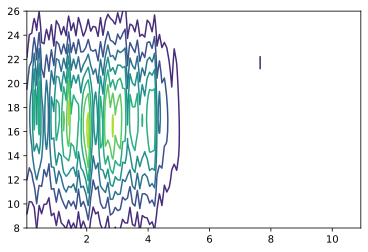

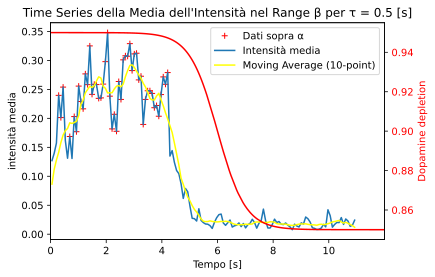

In [8]:
mask = (8 <= f) & (f <= 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= alpha_mean], pow_t[pow_t >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

In [9]:
utils.burst_sequence((Sxx_max_index>=alpha)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(1, [53], 53.0)

In [10]:
utils.burst_sequence((pow_t>=alpha_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(1, [43], 43.0)